In [1]:
from genome import Genome, World
from genetic import *

from ultimatum import Ultimatum
import copy
import random

from genetic_counter_strategy import Genetico_counter


# Para testear interacción con ecológico
from ecologico import Ecologico
from agente import Agente 
from estrategias import *

In [ ]:
world = World()
seed_genoma_proponer = Genome(world, 4, 1)
seed_genoma_aceptar = Genome(world, 5, 1)



In [ ]:
n_agentes = 300
genomas = []
for i in range(n_agentes):
    copia_proponer = seed_genoma_proponer.copy()
    copia_aceptar = seed_genoma_aceptar.copy()
    genomas.append((copia_proponer, copia_aceptar))

print(genomas)

[(<genome.Genome object at 0x0000026D84D7C100>, <genome.Genome object at 0x0000026D84D7FD60>), (<genome.Genome object at 0x0000026D84D7FD30>, <genome.Genome object at 0x0000026D84D7FCD0>), (<genome.Genome object at 0x0000026D84D7C1F0>, <genome.Genome object at 0x0000026D84D7C250>), (<genome.Genome object at 0x0000026D84D7C2B0>, <genome.Genome object at 0x0000026D84D7FC70>), (<genome.Genome object at 0x0000026D84D7FD90>, <genome.Genome object at 0x0000026D84D7FEB0>), (<genome.Genome object at 0x0000026D84D7CAC0>, <genome.Genome object at 0x0000026D84D7CA30>), (<genome.Genome object at 0x0000026D84D7CAF0>, <genome.Genome object at 0x0000026D84D7FFD0>), (<genome.Genome object at 0x0000026D84D7CB50>, <genome.Genome object at 0x0000026D84D7C7F0>), (<genome.Genome object at 0x0000026D84D7C9D0>, <genome.Genome object at 0x0000026D84D7FA60>), (<genome.Genome object at 0x0000026D84D7FA00>, <genome.Genome object at 0x0000026D84D7FDF0>), (<genome.Genome object at 0x0000026D84D7FE80>, <genome.Geno

In [4]:
def create_random_adjacency_list(n, k):
    edges = set()
    
    while len(edges) < k:
        u = random.randint(0, n-1)
        v = random.randint(0, n-1)
        if u != v:
            edge = tuple(sorted((u, v)))  # Sort the tuple to avoid (u, v) and (v, u) as different
            edges.add(edge)
    
    return list(edges)

topologia_densa = topologia_densa = create_random_adjacency_list(100, 80*99/2)


In [5]:
mutaciones = {
    'n_sobrevivientes' : 50,
    'n_mutar_pesos' : 120,
    'p_mutar_peso' : 0.4,
    'p_gaussiana' : 0.6,
    'n_cruces' : 80,
    'n_nuevo_nodo' : 25,
    'n_nuevo_eje' : 25,
    'speciation' : False,
    'c1_distance' : 1,
    'c2_distance' : 1,
    'c3_distance' : 0.4,
    'cota_especiacion' : 4
}

In [6]:
genetico = Genetico(2000, 7000, genomas, 300, create_random_adjacency_list(300, 700), mutaciones)

In [7]:
# genetico.assign_species(genetico.genomas)
# genetico.update_fitness_by_species
# genetico.genomas[60][1].genetic_distance(genetico.genomas[1][1],1,1,3)

In [8]:
genetico.competir()
# TODO: Competir solo con los sobrevivientes y con tu propia estrategia.

generación 0 concluida.
Poblaciones: [300]
generación 10 concluida.
Poblaciones: [300]
generación 20 concluida.
Poblaciones: [300]
generación 30 concluida.
Poblaciones: [300]
generación 40 concluida.
Poblaciones: [300]
generación 50 concluida.
Poblaciones: [300]
generación 60 concluida.
Poblaciones: [300]
generación 70 concluida.
Poblaciones: [300]
generación 80 concluida.
Poblaciones: [300]
generación 90 concluida.
Poblaciones: [300]
generación 100 concluida.
Poblaciones: [300]
generación 110 concluida.
Poblaciones: [300]
generación 120 concluida.
Poblaciones: [300]
generación 130 concluida.
Poblaciones: [300]
generación 140 concluida.
Poblaciones: [300]
generación 150 concluida.
Poblaciones: [300]
generación 160 concluida.
Poblaciones: [300]
generación 170 concluida.
Poblaciones: [300]
generación 180 concluida.
Poblaciones: [300]
generación 190 concluida.
Poblaciones: [300]
generación 200 concluida.
Poblaciones: [300]
generación 210 concluida.
Poblaciones: [300]
generación 220 conclu

Traceback (most recent call last):
  File "C:\Users\Juan FZ\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Juan FZ\AppData\Local\Temp\ipykernel_18108\4200183441.py", line 1, in <module>
    genetico.competir()
  File "c:\Users\Juan FZ\OneDrive\msscae\src\genetic.py", line 277, in competir
    self.generacion(self.genomas)
  File "c:\Users\Juan FZ\OneDrive\msscae\src\genetic.py", line 176, in generacion
    ultimatum.turno()
  File "c:\Users\Juan FZ\OneDrive\msscae\src\ultimatum.py", line 42, in turno
    propone.proponer(vecino)
  File "c:\Users\Juan FZ\OneDrive\msscae\src\agente.py", line 63, in proponer
    vecino_acepta = vecino.evaluar_oferta(self, valor_ofrecido) # mandarle al otro para que acepte o rechace
  File "c:\Users\Juan FZ\OneDrive\msscae\src\agente.py", line 74, in evaluar_oferta
    aceptar = self.estrategia_aceptar(self, vecino, valor)
  File

In [7]:
s0 = genetico.sobrevivientes[0][0]
s1 = genetico.sobrevivientes[0][1]

NameError: name 'genetico' is not defined

In [12]:
s0 = genetico.sobrevivientes[8][0] # la 85 fue interesante.
# s0.apply_network([5, True, 5, True, 5, True])
# s0.apply_network([5, True, 1, False, 1, False])
# s0.apply_network([1, False, 1, False, 1, False])
s0.apply_network([1, True, 1, True])
s0.apply_network([1, False, 1, False])

-3.7117215533038235

# Próximos pasos:
- Algoritmo genético para evolucionar una estrategia que funcione bien contra una estrategia específica (jugar 100 veces con esa estrategia para maximizar su comportamiento)
- Testear especiación
- Correr el algoritmo genético con especiación y ver quién gana.
- Armar un algoritmo genético que se entrene para ganarle a una población de estrategias preestablecidas
    - Fitness: cuántas generaciones dura nuestra estrategia, ponderado con cuántos individuos hay al final en caso de sobrevivir todas las generaciones.
    - Cortar el algoritmo cuando la estrategia genética se extingue.
- Armar un algoritmo genético que evolucione en dilemas del prisionero iterado a ver si surge tit for tat.


In [14]:
s0.nodes

{0: {'bias': 0, 'type': 0, 'activation': 1},
 6: {'bias': -3.929880114574958, 'type': 2, 'activation': -3.7117215533038235},
 7: {'bias': -0.18784426847527513,
  'type': 2,
  'activation': -0.01290737708499845},
 8: {'bias': -3.39099147771506, 'type': 2, 'activation': 166.41115749415133},
 9: {'bias': 4.331783948688793, 'type': 2, 'activation': -2.825219328750477},
 10: {'bias': -3.659725563176953, 'type': 2, 'activation': 173.25074383472457},
 11: {'bias': 1.1423157676405502, 'type': 2, 'activation': 47.52194270143454},
 12: {'bias': -0.9138710409862324,
  'type': 2,
  'activation': -18.352172666045877},
 13: {'bias': -5.268972781632046, 'type': 2, 'activation': 6.905614808101745},
 14: {'bias': -0.9323827926705031,
  'type': 2,
  'activation': -124.02230465200682},
 1: {'bias': 0, 'type': 0, 'activation': False},
 2: {'bias': 0, 'type': 0, 'activation': 1},
 3: {'bias': 0, 'type': 0, 'activation': False},
 4: {'bias': 0, 'type': 0, 'activation': 0},
 5: {'bias': 0, 'type': 0, 'activa

In [15]:
s0.connections 

[{'in': 0,
  'out': 6,
  'weight': -6.187134643468399,
  'enabled': False,
  'innovation': 1},
 {'in': 0,
  'out': 7,
  'weight': -2.1670852498701016,
  'enabled': False,
  'innovation': 2},
 {'in': 0,
  'out': 8,
  'weight': 0.13189784461921103,
  'enabled': False,
  'innovation': 3},
 {'in': 0,
  'out': 9,
  'weight': -4.642935394750831,
  'enabled': True,
  'innovation': 4},
 {'in': 0,
  'out': 10,
  'weight': -6.938481586094274,
  'enabled': True,
  'innovation': 5},
 {'in': 0,
  'out': 11,
  'weight': -0.766516520287069,
  'enabled': False,
  'innovation': 6},
 {'in': 0,
  'out': 12,
  'weight': -3.404742057259594,
  'enabled': True,
  'innovation': 7},
 {'in': 0,
  'out': 13,
  'weight': 2.037575231243662,
  'enabled': True,
  'innovation': 8},
 {'in': 0,
  'out': 14,
  'weight': -0.40560975189669396,
  'enabled': False,
  'innovation': 9},
 {'in': 1,
  'out': 6,
  'weight': 3.429145666020437,
  'enabled': True,
  'innovation': 10},
 {'in': 1,
  'out': 7,
  'weight': -3.176200129

In [23]:
s1.apply_network([1, True, 5, False, 9])

16.346261505398193

In [15]:
def implementa_recepcion_tacaña(genoma):
    res = True
    for i in range(1, 10):
            for bool_1 in [True, False]:
                for j in range(1, 10):
                    for bool_2 in [True, False]:
                        for k in range(1, 10):
                            res = res and not genoma.apply_network([i, bool_1, j, bool_2, k]) <= 0
    return res

# implementa_recepcion_tacaña(s1)

In [17]:
def implementa_propuesta_tacaña(genoma_proponer):
    res = True
    for i in range(1, 10):
        for bool_1 in [True, False]:
            for j in range(1, 10):
                for bool_2 in [True, False]:
                    propuesta = genoma_proponer.apply_network([i, bool_1, j, bool_2])
                    if res <= 1:
                        propuesta = 1
                    if res > 9:
                        propuesta = 9
                    propuesta = round(propuesta)
                    res = res and propuesta == 1
    return res

# implementa_propuesta_tacaña(s0)

In [19]:
def implementa_estrategia_tacaña(tupla_genomas):
    return implementa_propuesta_tacaña(tupla_genomas[0]) and implementa_recepcion_tacaña(tupla_genomas[1])

# implementa_estrategia_tacaña(genetico.sobrevivientes[0])

In [35]:
implementa_estrategia_tacaña(genetico.sobrevivientes[100])

False

In [34]:
len(genetico.sobrevivientes)

170

In [39]:
implementa_recepcion_tacaña(genetico.sobrevivientes[100][1])

False

In [26]:
def diferencias_con_recepcion_tacaña(genoma):
    res = True
    for i in range(1, 10):
            for bool_1 in [True, False]:
                for j in range(1, 10):
                    for bool_2 in [True, False]:
                        for k in range(1, 10):
                            if genoma.apply_network([i, bool_1, j, bool_2, k]) <= 0:
                                 print([i, bool_1, j, bool_2, k])
    return res

# diferencias_con_recepcion_tacaña(genetico.sobrevivientes[100][1])

In [11]:
target = (estrat_proponer_t4t, estrat_aceptar_t4t)

genetico_counter = Genetico_counter(100, 500, genomas, mutaciones, 300, target, False)

In [12]:
genetico_counter.competir()

generación 0 concluida.
Mejor fitness: 0.0
Poblaciones: [300]
generación 10 concluida.
Mejor fitness: 4.41
Poblaciones: [300]
generación 20 concluida.
Mejor fitness: 4.44
Poblaciones: [300]
generación 30 concluida.
Mejor fitness: 4.46
Poblaciones: [300]
generación 40 concluida.
Mejor fitness: 4.48
Poblaciones: [300]
generación 50 concluida.
Mejor fitness: 4.41
Poblaciones: [300]
generación 60 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 70 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 80 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 90 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 100 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 110 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 120 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 130 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 140 concluida.
Mejor fitness: 4.8
Poblaciones: [300]
generación 150 concluida.
Mejor fitness: 4.8
P

KeyboardInterrupt: 

In [13]:
s0_p = strategy_propose(genetico_counter.sobrevivientes[0][0])
s0_a = strategy_accept(genetico_counter.sobrevivientes[0][1])

In [14]:
from experimentos import Experimentos

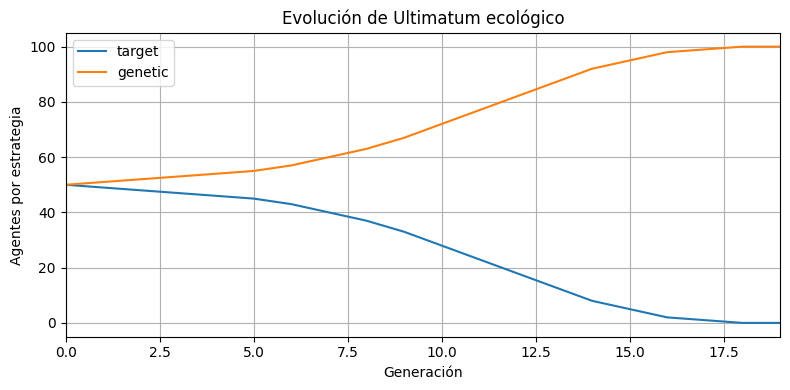

In [16]:
experimentos = Experimentos(1000, 100, 100)

estrategias = {
    "target" : (target[0], target[1], 50),
    "genetic" : (s0_p, s0_a, 50)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

In [17]:
experimentos.graficar_proporcion_ganadores(50, topologia_densa, estrategias)

In [6]:
## Estrategias de control

azarosa = (estrat_proponer_rand, estrat_aceptar_rand)
hostil = (estrat_proponer_tacaña, estrat_aceptar_nunca)
promedio = (estrat_proponer_promedio, estrat_aceptar_promedio)
matching = (estrat_proponer_matching, estrat_aceptar_matching)
justa = (estrat_proponer_justa, estrat_aceptar_justa)
gradual = (estrat_proponer_gradual, estrat_aceptar_gradual)
opresora = (estrat_proponer_opresora, estrat_aceptar_opresora)

## Estrategias evaluadas

tacaña = (estrat_proponer_tacaña, estrat_aceptar_siempre)
antitacaña = (estrat_proponer_antitacaña, estrat_aceptar_antitacaña)
antitacaña_v2 = (estrat_proponer_antitacaña_2, estrat_aceptar_antitacaña)
reciproca = (estrat_proponer_t4t, estrat_aceptar_t4t)

mutaciones = {
    'n_sobrevivientes' : 30,
    'n_mutar_pesos' : 30,
    'p_mutar_peso' : 0.4,
    'p_gaussiana' : 0.6,
    'n_cruces' : 8,
    'n_nuevo_nodo' : 5,
    'n_nuevo_eje' : 5,
    'speciation' : False,
    'c1_distance' : 1,
    'c2_distance' : 1,
    'c3_distance' : 0.4,
    'cota_especiacion' : 4
}

target = {
    # "azarosa" : (azarosa[0], azarosa[1], 20),
    #"hostil" : (hostil[0], hostil[1], 10),
    #"promedio" : (promedio[0], promedio[1], 10),
    #"matching" : (matching[0], matching[1], 10),
    #"opresora" : (opresora[0], opresora[1], 10),
    #"justa" : (justa[0], justa[1], 10),
    #"gradual" : (gradual[0], gradual[1], 10),
    "tacaña" : (tacaña[0], tacaña[1], 50)
}

n_agentes = 70
genomas = []
for i in range(n_agentes):
    copia_proponer = seed_genoma_proponer.copy()
    copia_aceptar = seed_genoma_aceptar.copy()
    genomas.append((copia_proponer, copia_aceptar))

print(len(genomas))

genetico_counter = Genetico_counter(700, 500, genomas, mutaciones, 70, target, True, 70, 100, topologia_densa)
genetico_counter.competir()


70
Agentes ecologico: 100
Target: {'tacaña': (<function estrat_proponer_tacaña at 0x0000026D84D56F80>, <function estrat_aceptar_siempre at 0x0000026D84D56DD0>, 50)}
Totales: 50
Extra: 50
generación 0 concluida.
Mejor fitness: 0.6377819691489661
Poblaciones: [70]
Agentes ecologico: 100
Target: {'tacaña': (<function estrat_proponer_tacaña at 0x0000026D84D56F80>, <function estrat_aceptar_siempre at 0x0000026D84D56DD0>, 50)}
Totales: 50
Extra: 50
generación 1 concluida.
Mejor fitness: 0.6368842916311829
Poblaciones: [70]
Agentes ecologico: 100
Target: {'tacaña': (<function estrat_proponer_tacaña at 0x0000026D84D56F80>, <function estrat_aceptar_siempre at 0x0000026D84D56DD0>, 50)}
Totales: 50
Extra: 50
generación 2 concluida.
Mejor fitness: 0.6047679966808451
Poblaciones: [70]
Agentes ecologico: 100
Target: {'tacaña': (<function estrat_proponer_tacaña at 0x0000026D84D56F80>, <function estrat_aceptar_siempre at 0x0000026D84D56DD0>, 50)}
Totales: 50
Extra: 50
generación 3 concluida.
Mejor fit

KeyboardInterrupt: 

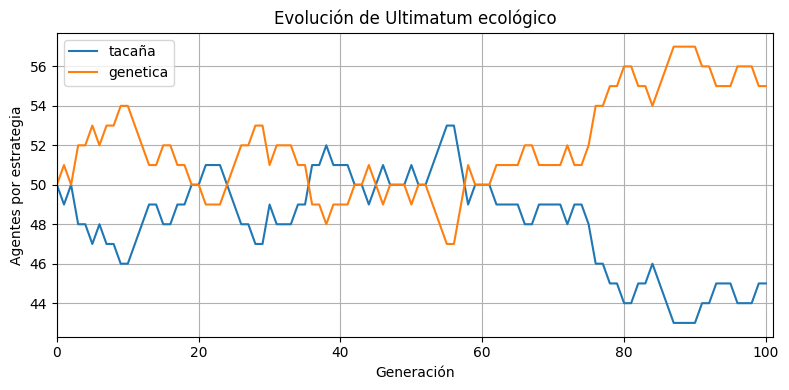

In [11]:
from experimentos import Experimentos

experimentos = Experimentos(1000, 100, 100)

s0_p = strategy_propose(genetico_counter.sobrevivientes[0][0])
s0_a = strategy_accept(genetico_counter.sobrevivientes[0][1])

estrategias = {
    # "azarosa" : (azarosa[0], azarosa[1], 10),
    # "antitacaña_v2" : (antitacaña_v2[0], antitacaña_v2[1], 10),
    # "hostil" : (hostil[0], hostil[1], 10),
    # "promedio" : (promedio[0], promedio[1], 10),
    # "matching" : (matching[0], matching[1], 10),
    # "opresora" : (opresora[0], opresora[1], 10),
    #"justa" : (justa[0], justa[1], 10),
    # "gradual" : (gradual[0], gradual[1], 10),
    "tacaña" : (tacaña[0], gradual[1], 50),
    "genetica" : (s0_p, s0_a, 50)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

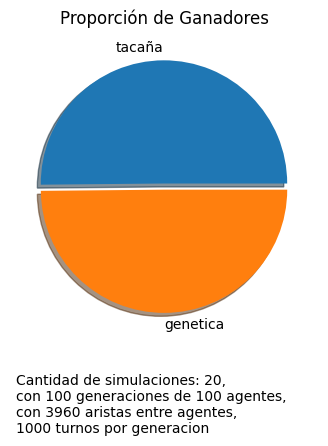

In [12]:
experimentos.graficar_proporcion_ganadores(20, topologia_densa, estrategias)

In [24]:
implementa_estrategia_tacaña((genetico_counter.sobrevivientes[0]))

False

In [28]:
diferencias_con_recepcion_tacaña(genetico_counter.sobrevivientes[0][1])

[1, True, 1, True, 2]
[1, True, 1, True, 3]
[1, True, 1, True, 4]
[1, True, 1, True, 5]
[1, True, 1, True, 6]
[1, True, 1, True, 7]
[1, True, 1, True, 8]
[1, True, 1, True, 9]
[1, True, 1, False, 3]
[1, True, 1, False, 4]
[1, True, 1, False, 5]
[1, True, 1, False, 6]
[1, True, 1, False, 7]
[1, True, 1, False, 8]
[1, True, 1, False, 9]
[1, True, 2, True, 2]
[1, True, 2, True, 3]
[1, True, 2, True, 4]
[1, True, 2, True, 5]
[1, True, 2, True, 6]
[1, True, 2, True, 7]
[1, True, 2, True, 8]
[1, True, 2, True, 9]
[1, True, 2, False, 3]
[1, True, 2, False, 4]
[1, True, 2, False, 5]
[1, True, 2, False, 6]
[1, True, 2, False, 7]
[1, True, 2, False, 8]
[1, True, 2, False, 9]
[1, True, 3, True, 3]
[1, True, 3, True, 4]
[1, True, 3, True, 5]
[1, True, 3, True, 6]
[1, True, 3, True, 7]
[1, True, 3, True, 8]
[1, True, 3, True, 9]
[1, True, 3, False, 4]
[1, True, 3, False, 5]
[1, True, 3, False, 6]
[1, True, 3, False, 7]
[1, True, 3, False, 8]
[1, True, 3, False, 9]
[1, True, 4, True, 3]
[1, True, 4,

True